In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
new_df= pd.read_csv('new_df_p_augmentation.csv')
new_df

,sub_mono,cover,sub_doble,sub_doble_intermitente,directo_cantar,trend,encoded_color,encoded_light,likes,views,comments,saved,compartidos
0,1,1,0,0,1,1,0,0,67100.000000,2.815000e+05,225.000000,8412.000000,2042.000000
1,1,0,0,0,0,0,0,2,7372.000000,5.840000e+04,66.000000,729.000000,52.000000
2,0,1,1,0,0,0,0,2,5927.000000,4.600000e+04,67.000000,725.000000,242.000000
3,0,0,1,0,0,0,0,2,110000.000000,7.461000e+05,614.000000,18500.000000,2509.000000
4,1,1,1,0,0,1,0,2,6812.000000,9.210000e+05,651.000000,836.000000,54.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,0,1,1,0,0,1,0,2,31604.539189,6.790352e+04,189.733887,220.428040,337.064970
2896,1,0,0,1,1,0,0,2,6813.074019,7.183009e+05,115.918186,730.260171,5517.195670
2897,1,1,0,0,0,0,0,2,31605.013650,7.182990e+05,1463.739876,6135.449393,2505.860047
2898,0,0,1,1,0,0,0,2,2911.123550,1.400002e+06,188.452053,303.521465,-3.353865


In [37]:
def calculate_std_counts(binary_column, numerical_column):
    within_std_left_1 = 0
    within_std_right_1 = 0
    within_2std_right_1 = 0
    beyond_2std_right_1 = 0

    within_std_left_0 = 0
    within_std_right_0 = 0
    within_2std_right_0 = 0
    beyond_2std_right_0 = 0

    mean = numerical_column.mean()
    std = numerical_column.std()

    for idx, value in enumerate(binary_column):
        if value == 1 and 0 <= numerical_column[idx] < mean:
            within_std_left_1 += 1
        elif value == 1 and mean <= numerical_column[idx] < (mean + std):
            within_std_right_1 += 1
        elif value == 1 and mean <= numerical_column[idx] < (mean + 2 * std):
            within_2std_right_1 += 1
        elif value == 1 and numerical_column[idx] > (mean + 2 * std):
            beyond_2std_right_1 += 1
        elif value == 0 and 0 <= numerical_column[idx] < mean:
            within_std_left_0 += 1
        elif value == 0 and mean <= numerical_column[idx] < (mean + std):
            within_std_right_0 += 1
        elif value == 0 and mean <= numerical_column[idx] < (mean + 2 * std):
            within_2std_right_0 += 1
        elif value == 0 and numerical_column[idx] > (mean + 2 * std):
            beyond_2std_right_0 += 1
        counts = within_std_left_0, within_std_right_0, within_2std_right_0, beyond_2std_right_0, within_std_left_1, within_std_right_1, within_2std_right_1, beyond_2std_right_1

    return counts

In [38]:
def plot_std_counts(binary_column, numerical_column, title='', xlabel='', ylabel=''):
    within_std_left_0, within_std_right_0, within_2std_right_0, beyond_2std_right_0, within_std_left_1, within_std_right_1, within_2std_right_1, beyond_2std_right_1 = calculate_std_counts(binary_column, numerical_column)
    categories = ['No&Left Std', 'No&Right Std', 'No&2Right Std', 'No&2+Right Std', 'Yes&Left Std', 'Yes&Right Std', 'Yes&2Right Std', 'Yes&2+Right Std']
    counts = [within_std_left_0, within_std_right_0, within_2std_right_0, beyond_2std_right_0, within_std_left_1, within_std_right_1, within_2std_right_1, beyond_2std_right_1]
    colors = ['red', 'red', 'red', 'red', 'skyblue', 'skyblue', 'skyblue', 'skyblue']

    plt.figure(figsize=(12, 4))  # Adjusted size to be smaller
    bars= plt.bar(categories, counts, color=colors[:4] + colors[4:])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count,
                 ha='center', va='bottom')
    plt.show()

In [39]:
target_description = new_df.describe()

In [40]:
target_description.drop(['sub_mono','cover','sub_doble','sub_doble_intermitente', 'trend','directo_cantar','encoded_color','encoded_light'], axis='columns')

,likes,views,comments,saved,compartidos
count,2900.000000,2.900000e+03,2900.000000,2900.000000,2900.000000
mean,42946.071080,3.598218e+05,390.461864,11410.021919,1558.150835
std,86698.440898,5.096626e+05,495.780883,21365.935034,3231.276726
min,147.000000,2.673798e+03,0.516637,15.373352,-3.819234
25%,2903.999050,3.130048e+04,67.251334,223.370056,68.688513
50%,8655.964960,1.072990e+05,144.466296,2249.911422,260.378829
75%,31603.308915,7.183014e+05,650.280353,18494.796726,1357.543460
max,556905.073025,3.400004e+06,1585.417399,98006.206798,14503.006880


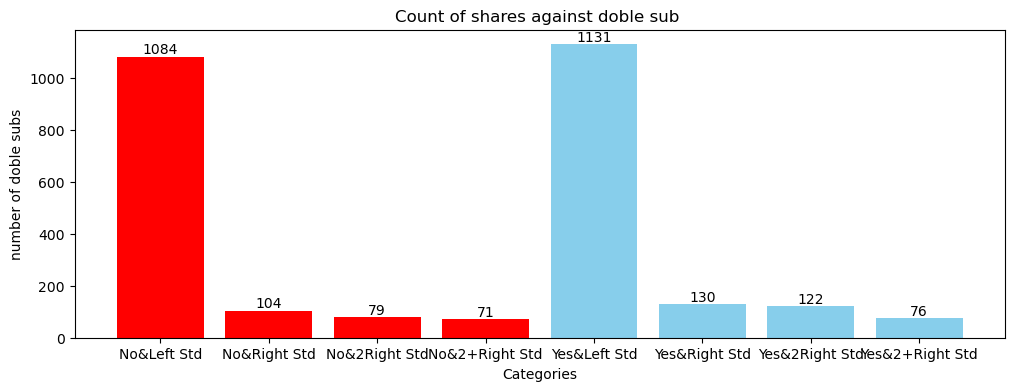

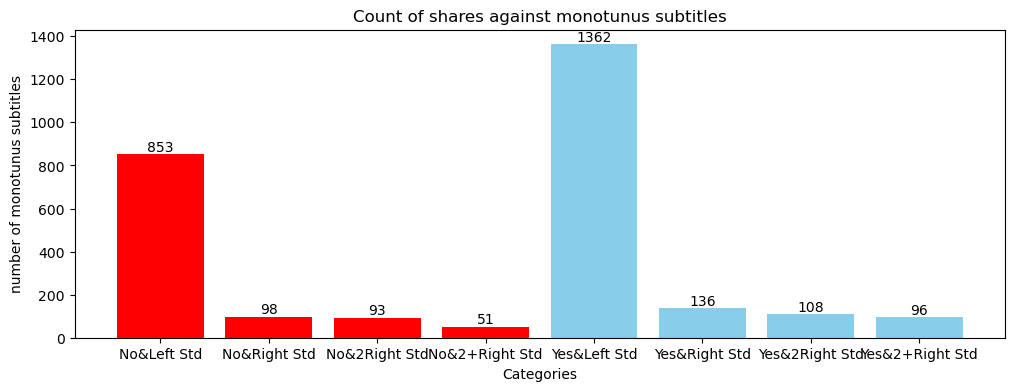

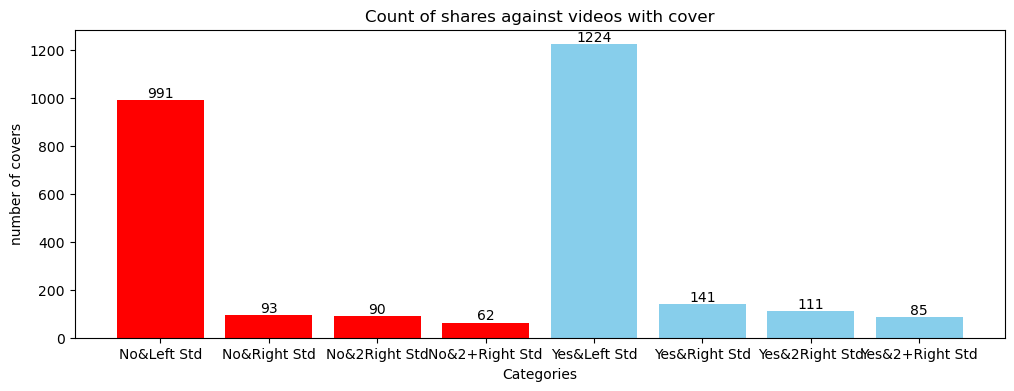

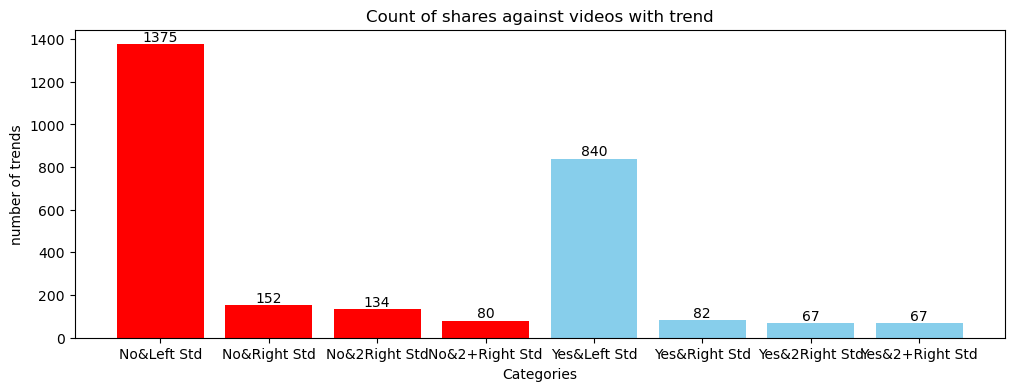

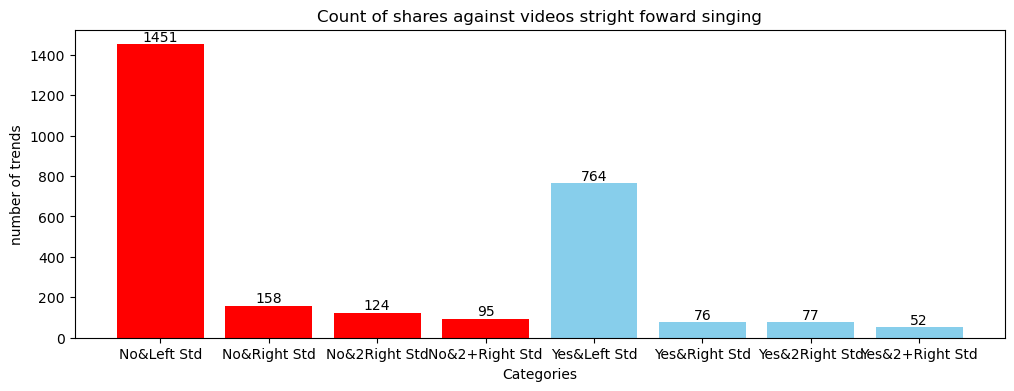

In [42]:
plot_std_counts(new_df['sub_doble'], new_df['compartidos'], title='Count of shares against doble sub ', xlabel='Categories', ylabel='number of doble subs')
plot_std_counts(new_df['sub_mono'], new_df['compartidos'], title='Count of shares against monotunus subtitles', xlabel='Categories', ylabel='number of monotunus subtitles')
plot_std_counts(new_df['cover'], new_df['compartidos'], title='Count of shares against videos with cover', xlabel='Categories', ylabel='number of covers')
plot_std_counts(new_df['trend'], new_df['compartidos'], title='Count of shares against videos with trend', xlabel='Categories', ylabel='number of trends')
plot_std_counts(new_df['directo_cantar'], new_df['compartidos'], title='Count of shares against videos stright foward singing', xlabel='Categories', ylabel='number of trends')

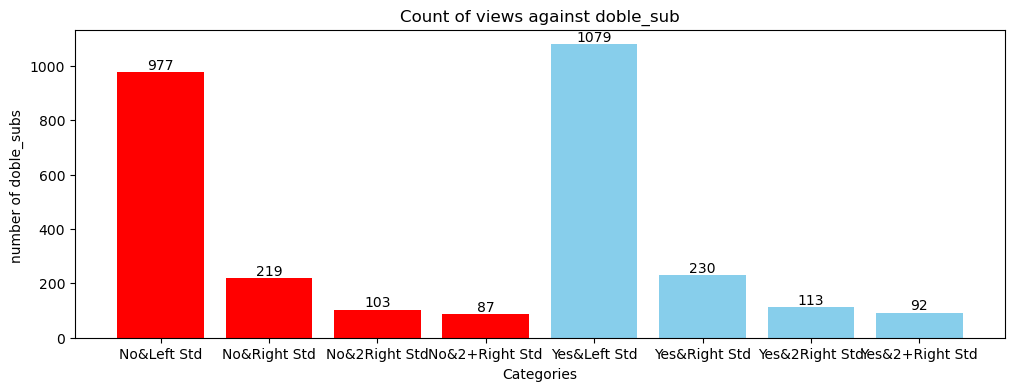

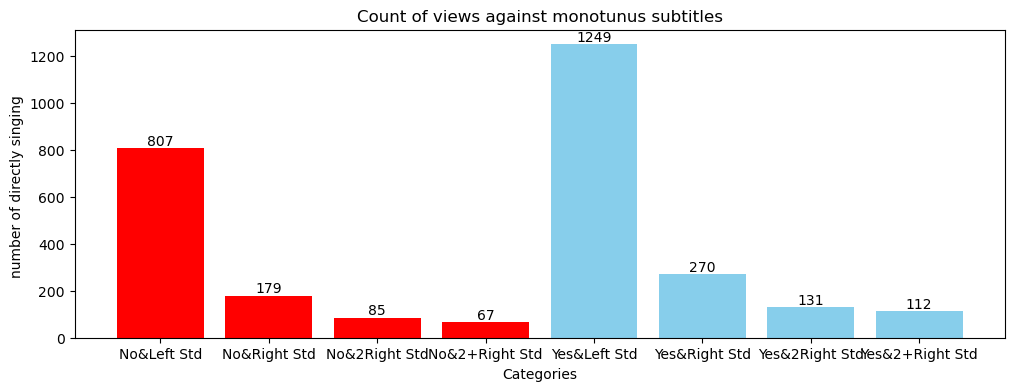

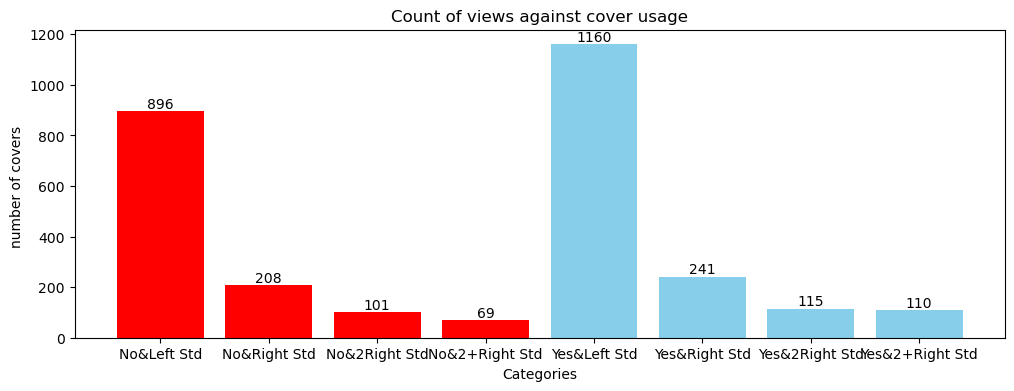

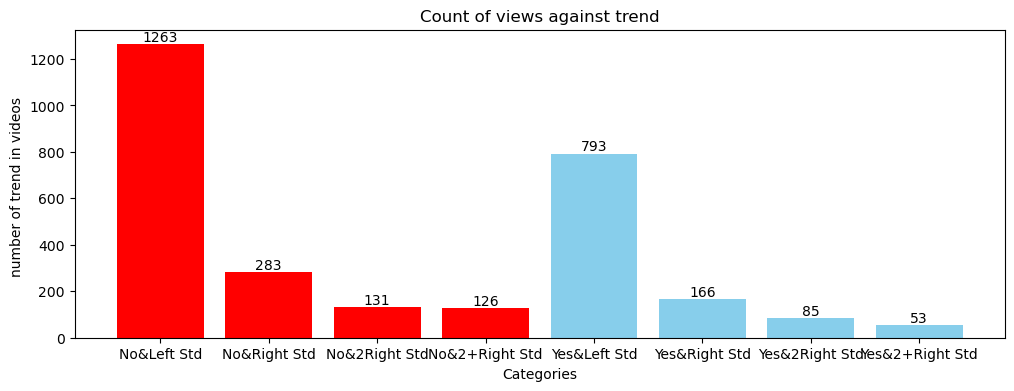

In [43]:
plot_std_counts(new_df['sub_doble'], new_df['views'], title='Count of views against doble_sub', xlabel='Categories', ylabel='number of doble_subs ')
plot_std_counts(new_df['sub_mono'], new_df['views'], title='Count of views against monotunus subtitles', xlabel='Categories', ylabel='number of directly singing ')
plot_std_counts(new_df['cover'], new_df['views'], title='Count of views against cover usage', xlabel='Categories', ylabel='number of covers ')
plot_std_counts(new_df['trend'], new_df['views'], title='Count of views against trend', xlabel='Categories', ylabel='number of trend in videos ')

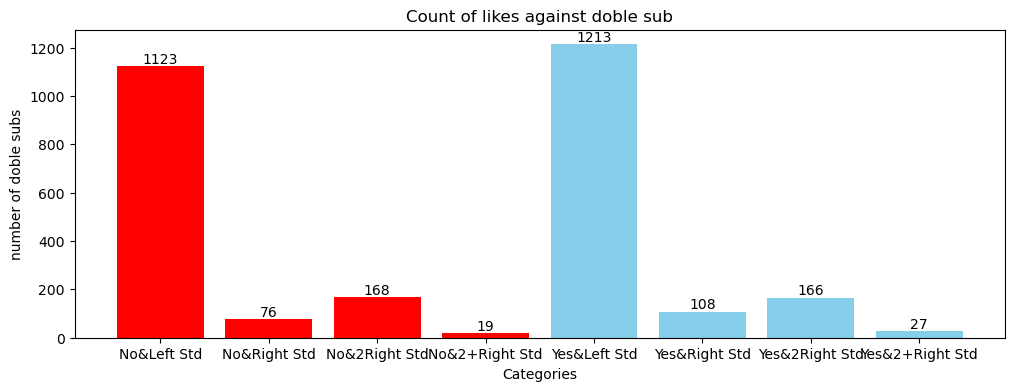

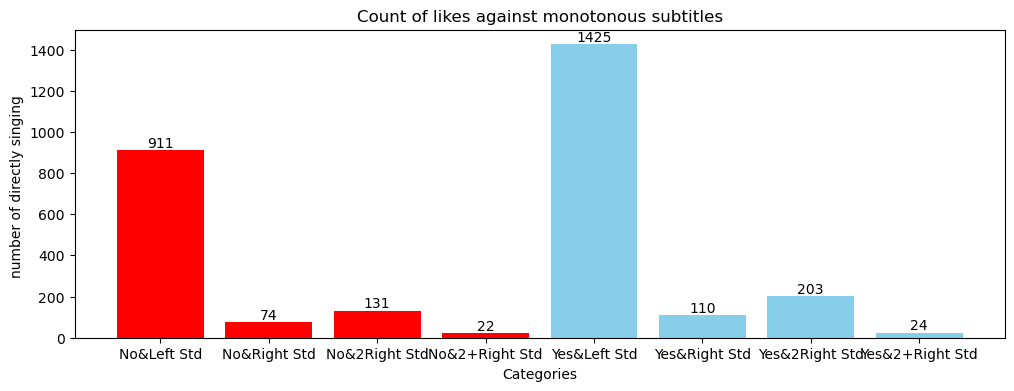

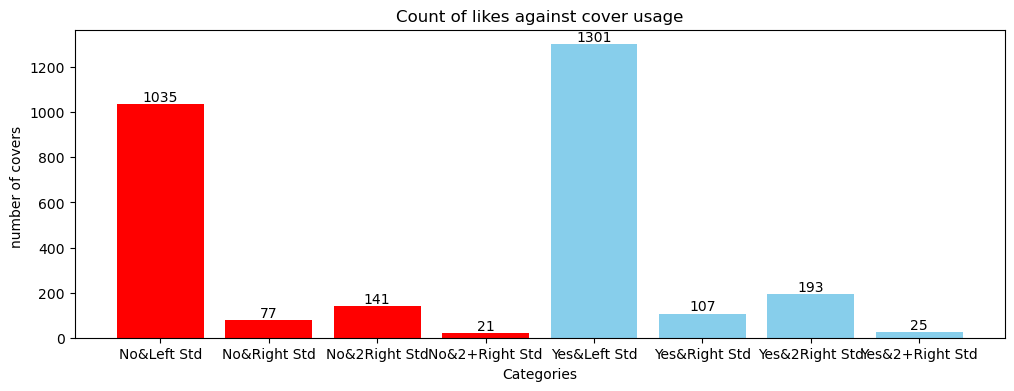

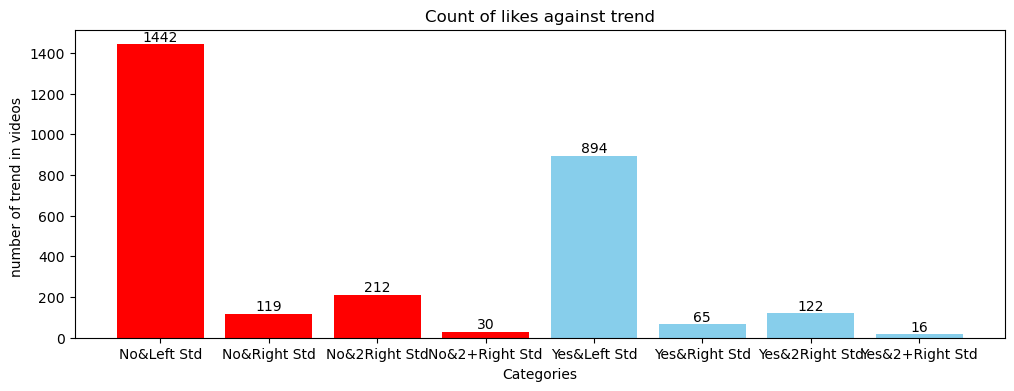

In [44]:
plot_std_counts(new_df['sub_doble'], new_df['likes'], title='Count of likes against doble sub', xlabel='Categories', ylabel='number of doble subs')
plot_std_counts(new_df['sub_mono'], new_df['likes'], title='Count of likes against monotonous subtitles', xlabel='Categories', ylabel='number of directly singing ')
plot_std_counts(new_df['cover'], new_df['likes'], title='Count of likes against cover usage', xlabel='Categories', ylabel='number of covers ')
plot_std_counts(new_df['trend'], new_df['likes'], title='Count of likes against trend', xlabel='Categories', ylabel='number of trend in videos ')

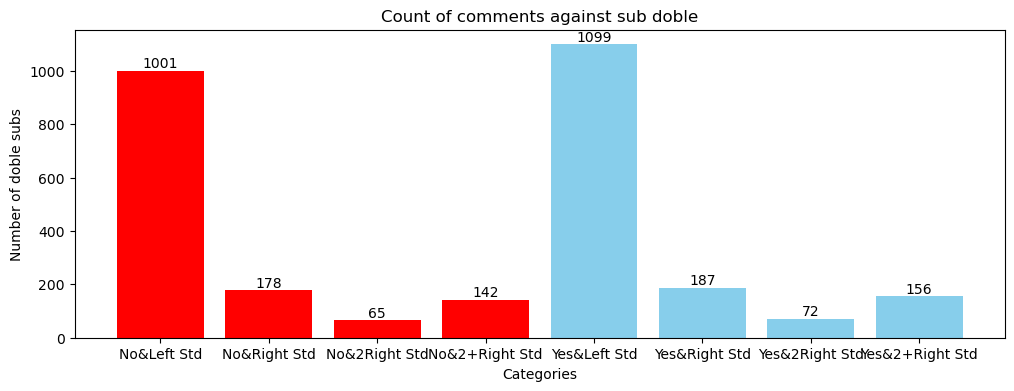

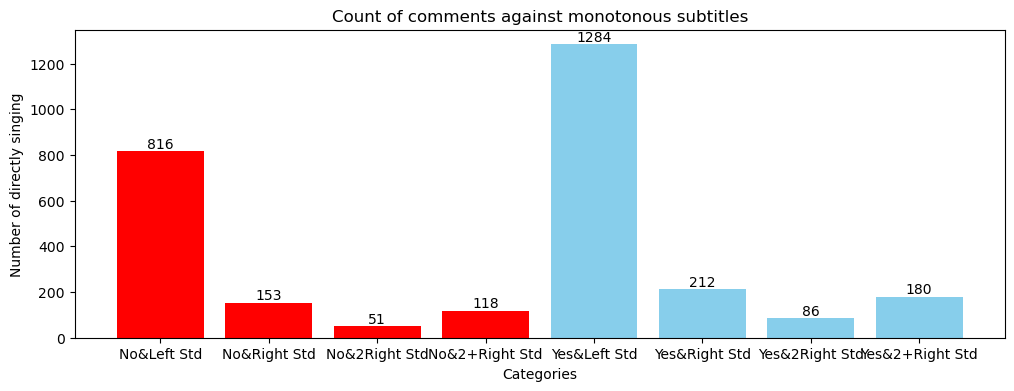

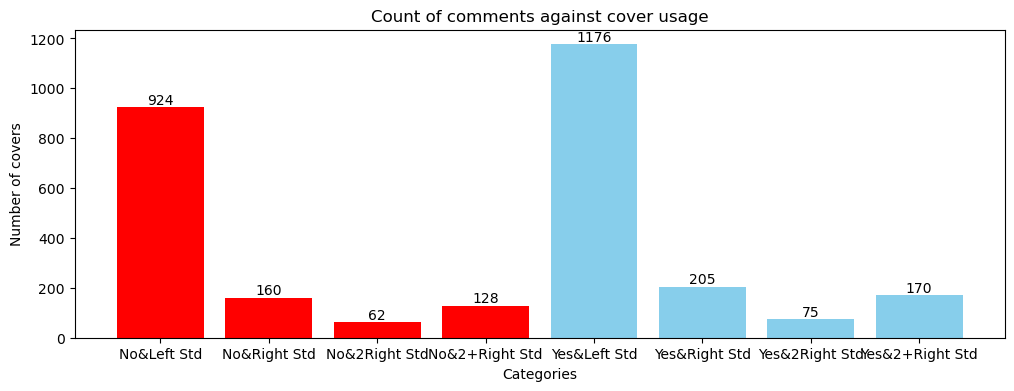

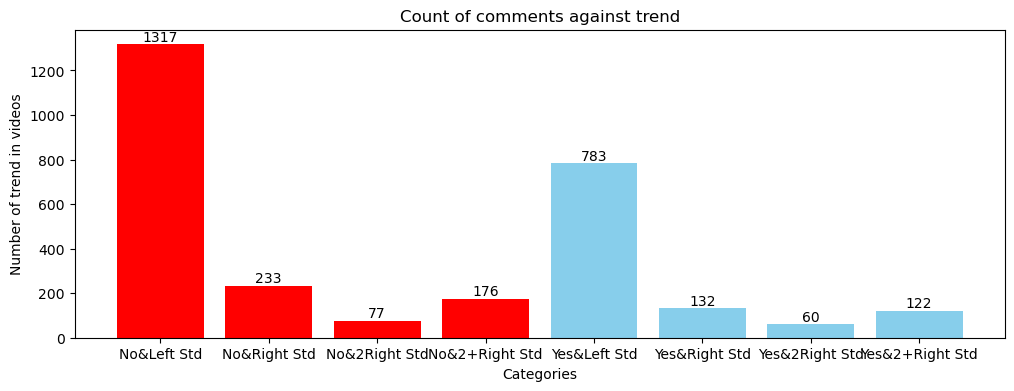

In [45]:
plot_std_counts(new_df['sub_doble'], new_df['comments'], title='Count of comments against sub doble', xlabel='Categories', ylabel='Number of doble subs')
plot_std_counts(new_df['sub_mono'], new_df['comments'], title='Count of comments against monotonous subtitles', xlabel='Categories', ylabel='Number of directly singing')
plot_std_counts(new_df['cover'], new_df['comments'], title='Count of comments against cover usage', xlabel='Categories', ylabel='Number of covers')
plot_std_counts(new_df['trend'], new_df['comments'], title='Count of comments against trend', xlabel='Categories', ylabel='Number of trend in videos')